I will use polynomial regression to predict order quantity. This model can help Adventure shop to prepare for new season. 

1. They can check how new bikes aveliable in 2013-2014 could perform next year. U can just pass to the model repeated values, except isNew (change from 0 to 1)
2. Thhey can chceck how rand new bikes (isNew = 0) could perform next year. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
sns.set(rc={'figure.figsize':(12,6)})

In [3]:
df = pd.read_csv('Data/PreparedData.csv')

In [4]:
# REpresentants:
# Color: Blcakc
# Class: H
# Sub Name: Mountain
# Moth: Jan
X = df[['Size', 'Weight', 'StanstadCost'
       , 'PriceToCost','FinalSellPrice' ,'Silver', 'Red', 'Yellow', 'Blue', 
        'L', 'M', 'isNew','Road Bikes', 'Touring Bikes', 
        'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'Isdiscounted', 'IsPriceHigherThanCosts']]

In [5]:
y = df['OrdersQuantity']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [8]:
# SPLIT THIS NEW POLY DATA SET
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [9]:
# TRAIN ON THIS NEW POLY SET
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# PREDICT ON BOTH TRAIN AND TEST
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_train,train_pred))


15.237667659333356

In [12]:
np.sqrt(mean_squared_error(y_test,test_pred))


16.82227837056913

In [13]:
mean_absolute_error(y_test,test_pred)

11.920481658467429

In [29]:
np.sqrt(mean_squared_error(y_test,test_pred))

16.82227837056913

In [31]:
c = pd.DataFrame()

In [32]:
c['y_test'] = y_test
c['test_pred'] = test_pred

In [37]:
c['mean_y_train'] = np.mean(y_train)

In [34]:
poly_features3

array([[3.8000000e+01, 2.0350000e+01, 1.8980944e+03, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.8000000e+01, 2.0350000e+01, 1.8980944e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.8000000e+01, 2.0350000e+01, 1.8980944e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [6.2000000e+01, 3.0000000e+01, 4.6144480e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [6.2000000e+01, 3.0000000e+01, 4.6144480e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [6.2000000e+01, 3.0000000e+01, 4.6144480e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [30]:
# absolute mean error from my model
mean_absolute_error(y_test,test_pred)

11.920481658467429

In [39]:
# absolute mean error with mean y_train value
mean_absolute_error(y_test,c['mean_y_train'])

23.8387447107407

In [40]:
c.head(1)

,y_test,test_pred,mean_y_train
1838,4,7.978916,30.956167


In [42]:
mean_absolute_error(y_test,test_pred)/c['mean_y_train'].iloc[0]

0.38507614946511287

As we can see my poly model is much better than average values, but results are still no satysfing. Mean order quantity is about 30 units. My model errors by 11.9 units (38.5% of mean), which can by confusing. I guess that acceptable results is from 5-10% errors versus mean order quantity. For now the model is useless

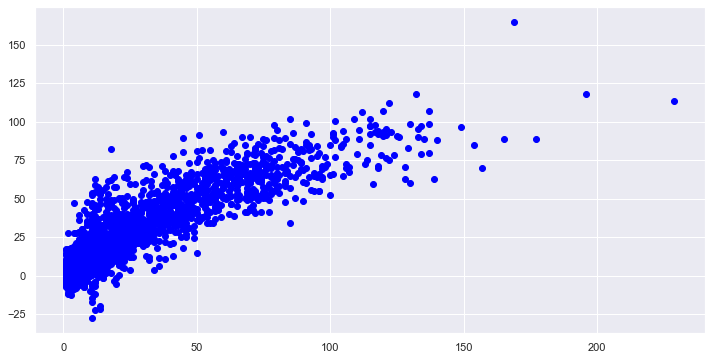

In [73]:
plt.scatter(y_train,train_pred,color="blue")

In [76]:
coef = pd.DataFrame(model.coef_)

In [79]:
coef

,0
0,1.837527e+03
1,-1.377866e+04
2,2.990001e+04
3,1.091044e+04
4,5.412958e+04
...,...
400,6.430704e+00
401,-2.075815e+01
402,-1.921537e+08
403,0.000000e+00


In [83]:
from sklearn.metrics import r2_score

r2_score(train_pred, y_train)

0.6717415509455367

The model describe the orders quantity predictions in about 67% on train, which is not bad

In [84]:
r2_score(test_pred, y_test)

0.6002145513800771

On test data model still works not bad